## Import Libraries

In [54]:
import os

# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image

In [19]:
import torch

from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

## Bring csv file with path & label

In [5]:
traindata_path = pd.read_csv('train_data.csv')

traindata_path.head()

,Unnamed: 0,img_path,label
0,0,../input/data/train/images/000309_male_Asian_2...,0
1,1,../input/data/train/images/000309_male_Asian_2...,0
2,2,../input/data/train/images/000309_male_Asian_2...,0
3,3,../input/data/train/images/000309_male_Asian_2...,0
4,4,../input/data/train/images/000309_male_Asian_2...,0


## Parameter

In [60]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
batch_size = 64
num_workers = 2

## Dataset
img = Image.open(path) - https://www.projectpro.io/recipes/convert-image-tensor-pytorch

In [31]:
def readImage(path_data):
    path_to_image = []
    for path in path_data:
        img = Image.open(path)
        path_to_image.append(img)
    return path_to_image

In [46]:
class MyDataset(Dataset):
    def __init__(self, data, transform, train):
        self._repr_indent = 4
        self.data = data
        self.X = readImage(self.data['img_path'])
        self.y = self.data['label']
        self.transform = transform
        self.train = train
        self.classes = list(set(self.y))
    
    def __getitem__(self, idx):
        X, y = self.X[idx], -1
        if self.transform:
            X = self.transform(X)
        if self.train:
            y = self.y[idx]

        return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)
    
    def __len__(self):
        return len(self.data)
    
    def __repr__(self):
        '''
        https://github.com/pytorch/vision/blob/master/torchvision/datasets/vision.py
        '''
        head = "My Custom Dataset : Mask Dataset"
#         data_path = self._repr_indent*" " + "Data path: {}".format(self.data['img_path'])
#         label_path = self._repr_indent*" " + "Label path: {}".format(self.data['label'])
        num_data = self._repr_indent*" " + "Number of datapoints: {}".format(self.__len__())
        num_classes = self._repr_indent*" " + "Number of classes: {}".format(len(self.classes))
#         return '\n'.join([head, data_path, label_path, num_data, num_classes])
        return '\n'.join([head, num_data, num_classes])

In [47]:
train_dataset = MyDataset(
    data = traindata_path,
    transform = transform,
    train = True
)

## Check Dataset
tensor to image - https://aigong.tistory.com/182

In [48]:
train_dataset

My Custom Dataset : Mask Dataset
    Number of datapoints: 18900
    Number of classes: 18

In [50]:
len(train_dataset)

18900

In [52]:
image, label = next(iter(train_dataset))
print(image)
print(label)

tensor([[[-0.9192, -0.9192, -0.9192,  ..., -1.3473, -1.3130, -1.2959],
         [-0.9363, -0.9363, -0.9363,  ..., -1.5014, -1.4843, -1.5014],
         [-0.9363, -0.9363, -0.9363,  ..., -1.4672, -1.4500, -1.4500],
         ...,
         [-0.0801, -0.0972, -0.1314,  ..., -0.3712, -0.3883, -0.4226],
         [-0.0972, -0.0972, -0.1314,  ..., -0.3712, -0.3883, -0.4226],
         [-0.0972, -0.0972, -0.1314,  ..., -0.3712, -0.3883, -0.4226]],

        [[-0.6352, -0.6352, -0.6352,  ..., -1.2304, -1.1954, -1.1779],
         [-0.6527, -0.6527, -0.6527,  ..., -1.3880, -1.3704, -1.3704],
         [-0.6527, -0.6527, -0.6527,  ..., -1.3354, -1.3179, -1.3179],
         ...,
         [-1.8081, -1.8256, -1.8431,  ..., -1.8606, -1.8782, -1.8782],
         [-1.8256, -1.8256, -1.8431,  ..., -1.8606, -1.8782, -1.8782],
         [-1.8256, -1.8256, -1.8431,  ..., -1.8606, -1.8782, -1.8782]],

        [[-0.5495, -0.5495, -0.5495,  ..., -1.1073, -1.0724, -1.0550],
         [-0.5670, -0.5670, -0.5670,  ..., -1

<ipython-input-46-c1a4239f972e>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(X, dtype=torch.double), torch.tensor(y, dtype=torch.long)


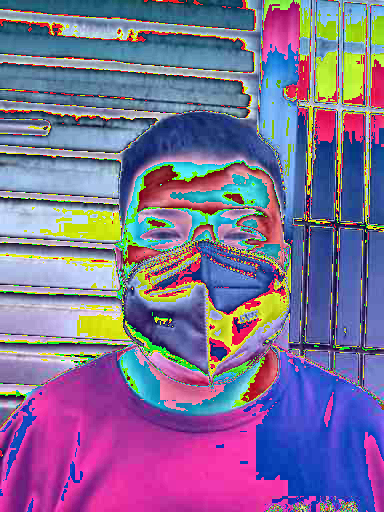

In [59]:
tensor_to_image = transforms.ToPILImage()
img = tensor_to_image(image)
img

## DataLoader

In [67]:
trainloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = batch_size,
    num_workers = num_workers,
    shuffle = True,
    drop_last = False
)

In [68]:
print(trainloader.dataset)

My Custom Dataset : Mask Dataset
    Number of datapoints: 18900
    Number of classes: 18
